In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

import pandas as pd
list_age = ['계','19~44','45~64','65~74','75 이상']
list_sex = ['계']
idx_sex = []
idx_age = []
idx_topic = []
value = []
i1 =''
for z in range(6,7):
    for i in list_age:
        for j in list_sex:
            data1 = pd.read_csv('../raw/통합 테이블(공원)_2019.csv')
            data2 = pd.read_csv('../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블(건강)_2019.csv')
            data2.rename(columns={'지역':'자치구'},inplace = True)
            df2 = data2[data2['연령별'] == i]
            df2 = df2[df2['성별'] == j]
            df2.set_index('자치구',inplace = True)
            data1.set_index('자치구',inplace = True)
            df = pd.concat([df2,data1],axis=1)
            df = df.drop(df.index[0])
            df = df.drop(['연령별','성별'],axis=1)
            df1 = df[[df.columns[z],'1인당 생활권 도시림 면적']]
            corr = df1.corr()
            value.append(corr.iloc[0][1])
            idx_age.append(i)
            idx_sex.append(j)
            idx_topic.append(df.columns[z])


In [2]:
df_final = pd.DataFrame({'우울감 경험률':value, '주제':idx_topic,'연령별':idx_age})

df_final = df_final.set_index(['주제','연령별'])

df_final.reset_index(inplace = True)
df_final

,주제,연령별,우울감 경험률
0,우울감 경험률,계,-0.200043
1,우울감 경험률,19~44,0.015366
2,우울감 경험률,45~64,-0.358103
3,우울감 경험률,65~74,0.097733
4,우울감 경험률,75 이상,-0.292015


In [8]:
## plotly 설치
!pip install plotly
!pip install plotly --upgrade
!pip install cufflinks

In [15]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

#colors = ['lightslategray',] * 5 
#colors[2] = 'pink' 특정 컬럼 색상만 변경
fig = go.Figure([go.Bar(x=df_final['연령별'], y=df_final['우울감 경험률'],
                         marker_color='pink')])
fig.update_layout(template="presentation")

fig.show()

Text(0, 0.5, '')

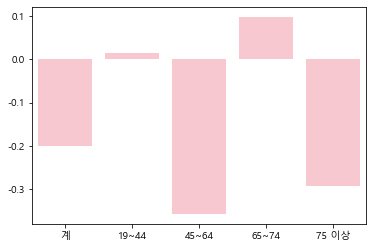

In [16]:
plt.rc('axes', unicode_minus=False)
sns.set_palette("pastel")
sns.barplot(data=df_final, x=df_final['연령별'], y=df_final['우울감 경험률'],color='pink')
plt.xlabel(None)
plt.ylabel(None)